In [1]:
# Import basic libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt        
%matplotlib inline

import sklearn.preprocessing as skp
import sklearn.model_selection as skm
import os
#import classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# first neural network with keras tutorial
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score 

In [4]:
df = pd.read_csv("hepatitis.csv")

In [3]:
print("Shape is :", df.shape)
display(df.dtypes)

Shape is : (142, 20)


class               int64
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palable      int64
spiders             int64
ascites             int64
varices             int64
bilirubin         float64
alk_phosphate       int64
sgot                int64
albumin           float64
protime             int64
histology           int64
dtype: object

In [4]:
df.isnull().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [5]:
df.head(5)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [6]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [7]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1.816901,40.816901,1.105634,1.514085,1.838028,1.359155,1.619718,1.795775,1.823944,1.584507,1.809859,1.669014,1.880282,1.880282,1.382958,105.647887,83.507042,3.830493,61.704225,1.443662
std,0.388116,12.189182,0.308456,0.501571,0.369729,0.481451,0.487174,0.404561,0.382216,0.494551,0.393801,0.472234,0.325781,0.325781,1.166526,47.375099,82.417700,0.618103,17.696732,0.498575
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,78.500000,32.250000,3.500000,56.250000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,100.000000,58.000000,3.900000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.480000,119.750000,99.500000,4.200000,66.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [8]:
df['age']  = np.where((df['age'] <18) ,'Teenager',
                               np.where((df['age'] >=18) & (df['age'] <=25),'Young',
                                np.where((df['age'] >=25) & (df['age'] <=40),'Adult',
                               'Old')))

In [9]:
df['age'].value_counts()

Old         65
Adult       63
Young       13
Teenager     1
Name: age, dtype: int64

In [10]:
df['sex'].value_counts() #male,female

1    127
2     15
Name: sex, dtype: int64

In [11]:
df.head(5)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,Adult,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,Old,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,Old,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,Adult,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,Adult,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


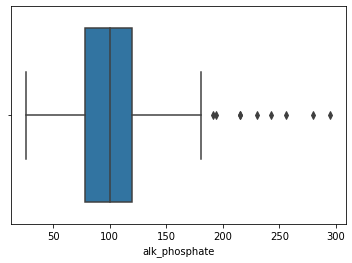

In [12]:
import seaborn as sns
sns.boxplot(x ='alk_phosphate', data=df)

In [13]:
from scipy import stats 

In [14]:
df['alk_phosphate']  = (df.alk_phosphate - df.alk_phosphate.min()) / (df.alk_phosphate.max() - df.alk_phosphate.min())

In [15]:
df.alk_phosphate=df.alk_phosphate.round(2)

In [16]:
df['age'] = pd.Categorical(df['age'])

In [17]:
dfDummies = pd.get_dummies(df['age'], prefix = 'age')

In [18]:
df = pd.concat([df, dfDummies], axis=1)

In [19]:
df.head(5)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,...,bilirubin,alk_phosphate,sgot,albumin,protime,histology,age_Adult,age_Old,age_Teenager,age_Young
0,2,Adult,2,1,2,2,2,2,1,2,...,1.0,0.22,18,4.0,61,1,1,0,0,0
1,2,Old,1,1,2,1,2,2,1,2,...,0.9,0.41,42,3.5,61,1,0,1,0,0
2,2,Old,1,2,2,1,2,2,2,2,...,0.7,0.26,32,4.0,61,1,0,1,0,0
3,2,Adult,1,2,2,2,2,2,2,2,...,1.0,0.29,200,4.0,61,1,1,0,0,0
4,2,Adult,1,2,2,2,2,2,2,2,...,0.9,0.26,28,4.0,75,1,1,0,0,0


In [20]:
del df['age']

In [21]:
df['sgot']  = (df.sgot - df.sgot.min()) / (df.sgot.max() - df.sgot.min())

In [22]:
df.sgot=df.sgot.round(2)

In [23]:
df['bilirubin']  = (df.bilirubin - df.bilirubin.min()) / (df.bilirubin.max() - df.bilirubin.min())

In [24]:
df.bilirubin=df.bilirubin.round(2)

In [25]:
df['protime']  = (df.protime - df.protime.min()) / (df.protime.max() - df.protime.min())
df.protime=df.protime.round(2)

In [26]:
df['albumin']  = (df.albumin - df.albumin.min()) / (df.albumin.max() - df.albumin.min())
df.albumin=df.albumin.round(2)

In [27]:
dfDummies = pd.get_dummies(df['sex'], prefix = 'sex')

In [28]:
df = pd.concat([df, dfDummies], axis=1)

In [29]:
del df['sex'];

In [30]:
dfDummies = pd.get_dummies(df['steroid'], prefix = 'steroid')
df = pd.concat([df, dfDummies], axis=1)
del df['steroid'];

In [31]:
dfDummies = pd.get_dummies(df['antivirals'], prefix = 'antivirals')
df = pd.concat([df, dfDummies], axis=1)
del df['antivirals'];

In [32]:
dfDummies = pd.get_dummies(df['fatigue'], prefix = 'fatigue')
df = pd.concat([df, dfDummies], axis=1)
del df['fatigue'];

In [33]:
dfDummies = pd.get_dummies(df['malaise'], prefix = 'malaise')
df = pd.concat([df, dfDummies], axis=1)
del df['malaise'];

In [34]:
dfDummies = pd.get_dummies(df['anorexia'], prefix = 'anorexia')
df = pd.concat([df, dfDummies], axis=1)
del df['anorexia'];

In [35]:
dfDummies = pd.get_dummies(df['spleen_palable'], prefix = 'spleen_palable')
df = pd.concat([df, dfDummies], axis=1)
del df['spleen_palable'];

In [36]:
dfDummies = pd.get_dummies(df['liver_big'], prefix = 'liver_big')
df = pd.concat([df, dfDummies], axis=1)
del df['liver_big'];

In [37]:
dfDummies = pd.get_dummies(df['liver_firm'], prefix = 'liver_firm')
df = pd.concat([df, dfDummies], axis=1)
del df['liver_firm'];

In [38]:
dfDummies = pd.get_dummies(df['spiders'], prefix = 'spiders')
df = pd.concat([df, dfDummies], axis=1)
del df['spiders'];

In [39]:
dfDummies = pd.get_dummies(df['ascites'], prefix = 'ascites')
df = pd.concat([df, dfDummies], axis=1)
del df['ascites'];

In [40]:
dfDummies = pd.get_dummies(df['varices'], prefix = 'varices')
df = pd.concat([df, dfDummies], axis=1)
del df['varices'];

In [41]:
df["class"].replace((1,2),(0,1),inplace=True)

In [42]:
df["class"]=df["class"].astype("bool")

In [43]:
df.head()

,class,bilirubin,alk_phosphate,sgot,albumin,protime,histology,age_Adult,age_Old,age_Teenager,...,liver_big_1,liver_big_2,liver_firm_1,liver_firm_2,spiders_1,spiders_2,ascites_1,ascites_2,varices_1,varices_2
0,True,0.09,0.22,0.01,0.44,0.61,1,1,0,0,...,1,0,0,1,0,1,0,1,0,1
1,True,0.08,0.41,0.04,0.33,0.61,1,0,1,0,...,1,0,0,1,0,1,0,1,0,1
2,True,0.05,0.26,0.03,0.44,0.61,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1
3,True,0.09,0.29,0.29,0.44,0.61,1,1,0,0,...,0,1,0,1,0,1,0,1,0,1
4,True,0.08,0.26,0.02,0.44,0.75,1,1,0,0,...,0,1,0,1,0,1,0,1,0,1


In [44]:
df.describe()

,bilirubin,alk_phosphate,sgot,albumin,protime,histology,age_Adult,age_Old,age_Teenager,age_Young,...,liver_big_1,liver_big_2,liver_firm_1,liver_firm_2,spiders_1,spiders_2,ascites_1,ascites_2,varices_1,varices_2
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.140493,0.295563,0.109859,0.402958,0.617042,1.443662,0.443662,0.457746,0.007042,0.091549,...,0.176056,0.823944,0.415493,0.584507,0.330986,0.669014,0.119718,0.880282,0.119718,0.880282
std,0.151888,0.176312,0.129724,0.143214,0.176967,0.498575,0.498575,0.499975,0.083918,0.289410,...,0.382216,0.382216,0.494551,0.494551,0.472234,0.472234,0.325781,0.325781,0.325781,0.325781
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050000,0.192500,0.030000,0.330000,0.562500,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.090000,0.280000,0.070000,0.420000,0.610000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.157500,0.350000,0.137500,0.490000,0.660000,2.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Load classification dataset
y = df['class'].copy()
X = df.drop('class',axis=1)
estimator = RandomForestClassifier()
cv = StratifiedKFold(5)
visualizer = RFECV(estimator, cv=cv, scoring='f1_weighted')
visualizer.fit(X, y)        # Fit the data to the visualizer
# visualizer.show()           # Finalize and render the figure

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='f1_weighted', step=1,
      verbose=0)

In [46]:
# print summaries for the selection of attributes
print(visualizer.support_)
print(visualizer.ranking_)
#storing index of the false columns
cols=[index for index,value in enumerate(visualizer.support_) if value == False] 
print(cols)
features= X.columns
print(features)

[ True False False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]
[ 1  2  3  1  1 11 28 15 32 23 26 29 19 24 30 31 27 22 14 13 20 17 18 12
 25 21 16  9  6  8  4  5 10  7]
[1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Index(['bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime', 'histology',
       'age_Adult', 'age_Old', 'age_Teenager', 'age_Young', 'sex_1', 'sex_2',
       'steroid_1', 'steroid_2', 'antivirals_1', 'antivirals_2', 'fatigue_1',
       'fatigue_2', 'malaise_1', 'malaise_2', 'anorexia_1', 'anorexia_2',
       'spleen_palable_1', 'spleen_palable_2', 'liver_big_1', 'liver_big_2',
       'liver_firm_1', 'liver_firm_2', 'spiders_1', 'spiders_2', 'ascites_1',
       'ascites_2', 'varices_1', 'varices_2'],
      dtype='object')


In [47]:
sorted_features=pd.DataFrame(list(zip(features,visualizer.support_))).sort_values(by=1,ascending=False)
print(sorted_features)

                   0      1
0          bilirubin   True
3            albumin   True
4            protime   True
26      liver_firm_1  False
20        anorexia_1  False
21        anorexia_2  False
22  spleen_palable_1  False
23  spleen_palable_2  False
24       liver_big_1  False
25       liver_big_2  False
27      liver_firm_2  False
18         malaise_1  False
28         spiders_1  False
29         spiders_2  False
30         ascites_1  False
31         ascites_2  False
32         varices_1  False
19         malaise_2  False
17         fatigue_2  False
1      alk_phosphate  False
16         fatigue_1  False
15      antivirals_2  False
14      antivirals_1  False
13         steroid_2  False
12         steroid_1  False
11             sex_2  False
10             sex_1  False
9          age_Young  False
8       age_Teenager  False
7            age_Old  False
6          age_Adult  False
5          histology  False
2               sgot  False
33         varices_2  False


In [48]:
#dropping faetures that are not that informative column index starts from zero index
X_after_dropping = X.drop(X.columns[cols],axis=1)
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)
features_orig= X.columns
features_select=X_after_dropping.columns
print(features_select)

Shape of X:  (142, 34)
Shape of y:  (142,)
Index(['bilirubin', 'albumin', 'protime'], dtype='object')


In [49]:
#create train-test split parts for manual split
trainX, testX, trainy, testy= skm.train_test_split(X_after_dropping, y, test_size=0.25, random_state=99)
print("\n Shape of train split: ")
print(trainX.shape, trainy.shape)
print("\n Shape of test split: ")
print(testX.shape, testy.shape)


 Shape of train split: 
(106, 3) (106,)

 Shape of test split: 
(36, 3) (36,)


In [50]:
# Random Forest
clf = RandomForestClassifier(n_estimators=50)
clf.fit(trainX,trainy)

predictions = clf.predict(testX)

acc_RF = accuracy_score(testy, predictions)*100
print('Accuracy of Random Forest (%): \n',acc_RF)
      

fpr1 , tpr1, _ = roc_curve(testy, predictions)
auc_RF = auc(fpr1, tpr1)*100
print("AUC of Random Forest (%): \n", auc_RF)

pre_RF = precision_score(testy,predictions)
print('Precision Score (%): \n',pre_RF )
rec_RF = recall_score(testy,predictions)
print('Recall Score (%): \n', rec_RF)

Accuracy of Random Forest (%): 
 77.77777777777779
AUC of Random Forest (%): 
 53.69458128078818
Precision Score (%): 
 0.8181818181818182
Recall Score (%): 
 0.9310344827586207


In [51]:
#MLP/Neural Network on Manual Split
#Default hyperparametres activation function is relu, optimiser is adams, default batch size=200, default max_iter/epochs=200
#clf = MLPClassifier()
#Try changing the number of layers and other parametres in the neural network and observe the effect on accuracy
clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=10,batch_size=200,max_iter=200, random_state=1)
clf.fit(trainX,trainy)
predictions = clf.predict(testX)

acc_NN = accuracy_score(testy, predictions)*100
print('Accuracy of MLP/Neural Network (%): \n',acc_NN)
      

fpr2 , tpr2, _ = roc_curve(testy, predictions)
auc_NN = auc(fpr2, tpr2)*100
print("AUC of MLP/Neural Network (%): \n", auc_NN)

pre_NN = precision_score(testy,predictions)
print('Precision Score (%): \n',pre_NN )
rec_NN = recall_score(testy,predictions)
print('Recall Score (%): \n', rec_NN)

Accuracy of MLP/Neural Network (%): 
 80.55555555555556
AUC of MLP/Neural Network (%): 
 60.83743842364531
Precision Score (%): 
 0.84375
Recall Score (%): 
 0.9310344827586207


In [52]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144
import sklearn.preprocessing as skp
import sklearn.model_selection as skm

# import classificaiton modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score, roc_curve, auc, f1_score

In [53]:
# K- NN on nanual Split

clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(trainX,trainy)
predictions = clf.predict(testX)

acc_K_NN = accuracy_score(testy, predictions)*100
print('Accuracy of KNN (%): \n',acc_K_NN)
      

fpr3 , tpr3, _ = roc_curve(testy, predictions)
auc_KNN = auc(fpr3, tpr3)*100
print("AUC of KNN (%): \n", auc_KNN)

pre_KNN = precision_score(testy,predictions)
print('Precision Score (%): \n',pre_KNN )
rec_KNN = recall_score(testy,predictions)
print('Recall Score (%): \n', rec_KNN)

Accuracy of KNN (%): 
 80.55555555555556
AUC of KNN (%): 
 50.0
Precision Score (%): 
 0.8055555555555556
Recall Score (%): 
 1.0


In [54]:
#svm
svm=clf = SVC(gamma="auto",kernel='poly',degree=3)
svm.fit(trainX,trainy)
predictions = svm.predict(testX)
acc_svm=accuracy_score(testy, predictions)*100
print("Accuracy of Support Vector Machine (%): \n",acc_svm)  
fpr4, tpr4, _ = roc_curve(testy, predictions)
auc_svm=auc(fpr4, tpr4)*100
print("AUC OF Support Vector Machine (%): \n", auc_svm)

pre_svm=precision_score(testy,predictions)*100
print("Precision of Support Vector Machine is: \n",pre_svm)
rec_svm=recall_score(testy,predictions)*100
print("Recall of Support Vector Machine is: \n",rec_svm)

Accuracy of Support Vector Machine (%): 
 80.55555555555556
AUC OF Support Vector Machine (%): 
 50.0
Precision of Support Vector Machine is: 
 80.55555555555556
Recall of Support Vector Machine is: 
 100.0


In [57]:
algos=["Random Forest","MLP/Neural Network","K Nearest Neighbor","SVM"]
acc=[acc_RF,acc_NN,acc_K_NN,acc_svm]
auc=[auc_RF,auc_NN,auc_KNN,auc_svm]
prec=[pre_RF,pre_NN,pre_KNN,pre_svm]
recall=[rec_RF,rec_NN,rec_KNN,rec_svm]
comp={"Algorithms":algos,"Accuracies":acc,"Area Under the Curve":auc,"Recall":recall,"Precision":prec}
compdf=pd.DataFrame(comp)
display(compdf.sort_values(by=["Accuracies","Area Under the Curve","Recall","Precision"], ascending=False))

,Algorithms,Accuracies,Area Under the Curve,Recall,Precision
1,MLP/Neural Network,80.555556,60.837438,0.931034,0.843750
3,SVM,80.555556,50.000000,100.000000,80.555556
2,K Nearest Neighbor,80.555556,50.000000,1.000000,0.805556
0,Random Forest,77.777778,53.694581,0.931034,0.818182


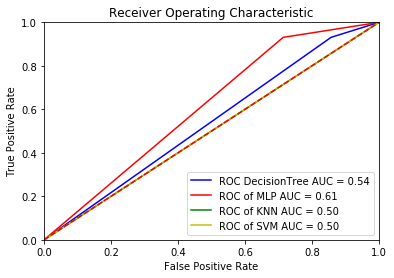

In [58]:
import sklearn.metrics as metrics
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)
roc_auc4 = metrics.auc(fpr4, tpr4)
import matplotlib.pyplot as plt
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'ROC DecisionTree AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'r', label = 'ROC of MLP AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'g', label = 'ROC of KNN AUC = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, 'y', label = 'ROC of SVM AUC = %0.2f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()